In [3]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler


iris = sns.load_dataset('iris')

scaler = StandardScaler()
scaled = scaler.fit_transform(
    iris[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].values
    )

covariance_matrix = np.cov(scaled.T)
covariance_matrix

array([[ 1.00671141, -0.11835884,  0.87760447,  0.82343066],
       [-0.11835884,  1.00671141, -0.43131554, -0.36858315],
       [ 0.87760447, -0.43131554,  1.00671141,  0.96932762],
       [ 0.82343066, -0.36858315,  0.96932762,  1.00671141]])

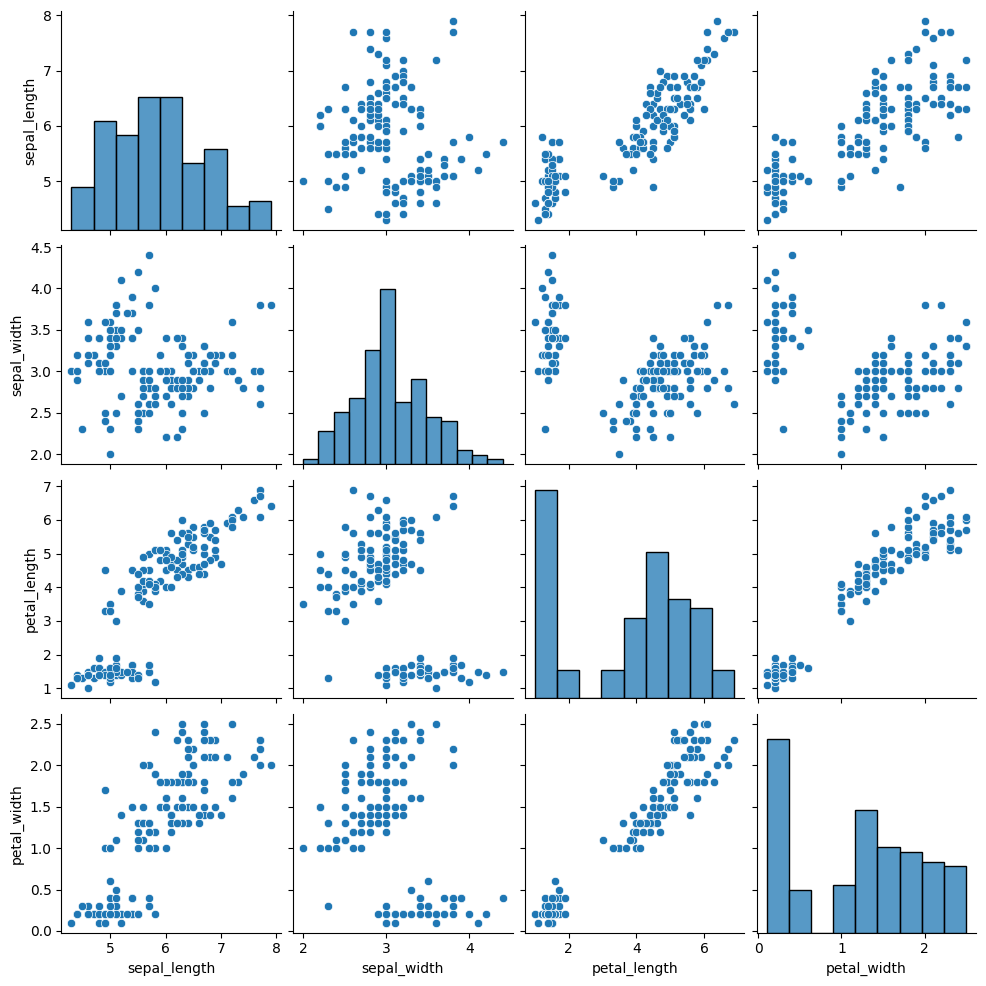

In [4]:
sns.pairplot(iris)

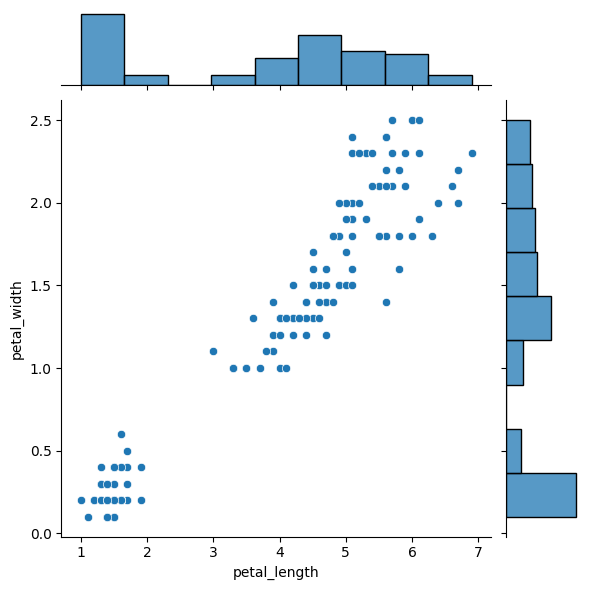

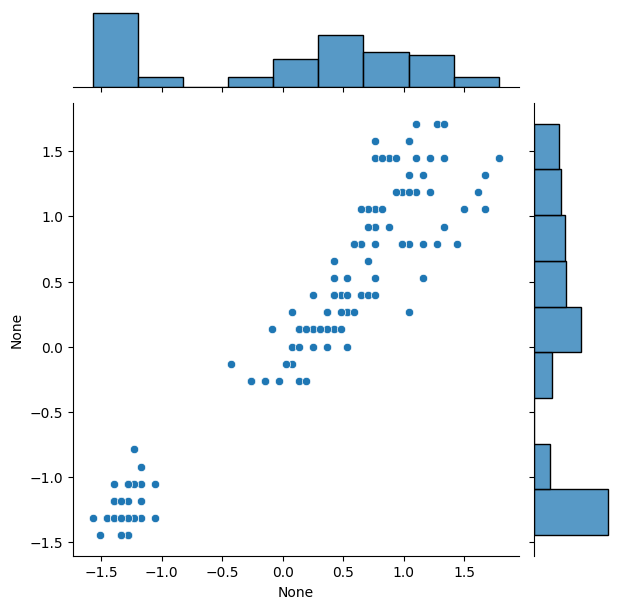

In [5]:
sns.jointplot(x= iris['petal_length'], y=iris['petal_width'])
sns.jointplot(x = scaled[:, 2], y = scaled[:,3])

Descomposicion en vectores y valores propios: https://numpy.org/doc/stable/reference/generated/numpy.linalg.eig.html

In [6]:
eigen_values, eigen_vectors = np.linalg.eig(covariance_matrix)

In [7]:
eigen_values

array([2.93808505, 0.9201649 , 0.14774182, 0.02085386])

In [8]:
eigen_vectors

array([[ 0.52106591, -0.37741762, -0.71956635,  0.26128628],
       [-0.26934744, -0.92329566,  0.24438178, -0.12350962],
       [ 0.5804131 , -0.02449161,  0.14212637, -0.80144925],
       [ 0.56485654, -0.06694199,  0.63427274,  0.52359713]])

In [9]:
variance_explained = []
for i in eigen_values:
    variance_explained.append((i/sum(eigen_values))*100)

print(variance_explained)

[72.96244541329987, 22.850761786701774, 3.668921889282877, 0.51787091071548]


PCA con scikit : https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

In [10]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(scaled)

PCA(n_components=2)

In [12]:
pca.explained_variance_ratio_

array([0.72962445, 0.22850762])

In [15]:
reduced_scaled = pca.transform(scaled)
print(reduced_scaled)

[[-2.26470281  0.4800266 ]
 [-2.08096115 -0.67413356]
 [-2.36422905 -0.34190802]
 [-2.29938422 -0.59739451]
 [-2.38984217  0.64683538]
 [-2.07563095  1.48917752]
 [-2.44402884  0.0476442 ]
 [-2.23284716  0.22314807]
 [-2.33464048 -1.11532768]
 [-2.18432817 -0.46901356]
 [-2.1663101   1.04369065]
 [-2.32613087  0.13307834]
 [-2.2184509  -0.72867617]
 [-2.6331007  -0.96150673]
 [-2.1987406   1.86005711]
 [-2.26221453  2.68628449]
 [-2.2075877   1.48360936]
 [-2.19034951  0.48883832]
 [-1.898572    1.40501879]
 [-2.34336905  1.12784938]
 [-1.914323    0.40885571]
 [-2.20701284  0.92412143]
 [-2.7743447   0.45834367]
 [-1.81866953  0.08555853]
 [-2.22716331  0.13725446]
 [-1.95184633 -0.62561859]
 [-2.05115137  0.24216355]
 [-2.16857717  0.52714953]
 [-2.13956345  0.31321781]
 [-2.26526149 -0.3377319 ]
 [-2.14012214 -0.50454069]
 [-1.83159477  0.42369507]
 [-2.61494794  1.79357586]
 [-2.44617739  2.15072788]
 [-2.10997488 -0.46020184]
 [-2.2078089  -0.2061074 ]
 [-2.04514621  0.66155811]
 

In [20]:
iris

,sepal_length,sepal_width,petal_length,petal_width,species,pca_1,pca_2
0,5.1,3.5,1.4,0.2,setosa,-0.900681,1.019004
1,4.9,3.0,1.4,0.2,setosa,-1.143017,-0.131979
2,4.7,3.2,1.3,0.2,setosa,-1.385353,0.328414
3,4.6,3.1,1.5,0.2,setosa,-1.506521,0.098217
4,5.0,3.6,1.4,0.2,setosa,-1.021849,1.249201
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,1.038005,-0.131979
146,6.3,2.5,5.0,1.9,virginica,0.553333,-1.282963
147,6.5,3.0,5.2,2.0,virginica,0.795669,-0.131979
148,6.2,3.4,5.4,2.3,virginica,0.432165,0.788808


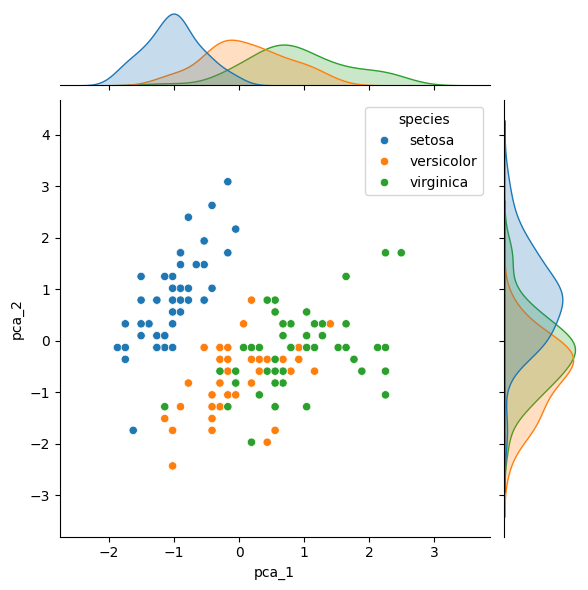

In [21]:
iris['pca_1'] = scaled[:,0]
iris['pca_2'] = scaled[:,1]
sns.jointplot(x=iris['pca_1'], y=iris['pca_2'], hue = iris['species'])

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=3f569948-e9a8-454f-8f4d-a27aa1610a87' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>